##Data Loading and Visualisation

In [1]:
#@title  importing libraries { display-mode: "form" }
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#@title creating dataframe { display-mode: "form" }
iris = load_iris()
df = pd.DataFrame(data=iris.data ,columns = iris.feature_names)
df['Class'] = iris.target
y =iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


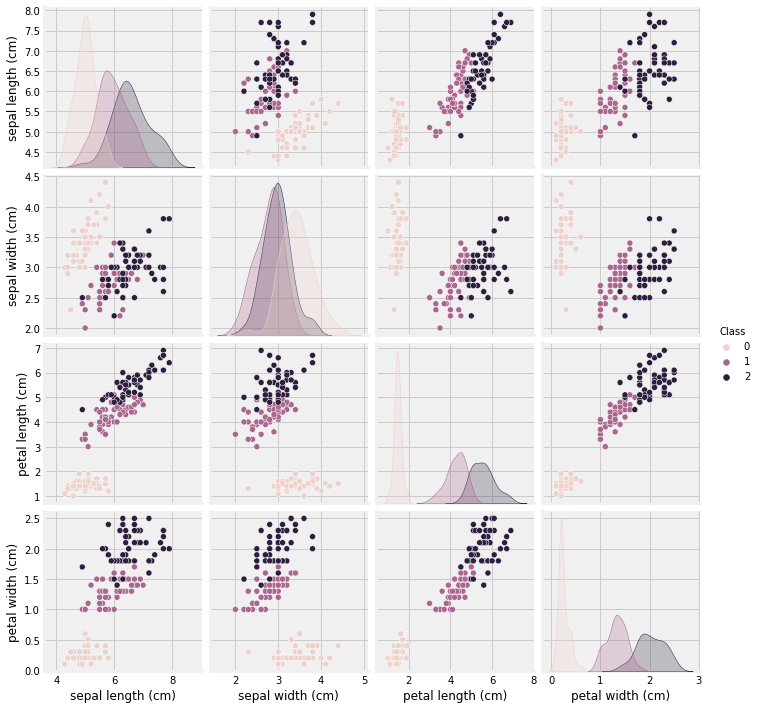

In [3]:
#@title Pairplot
sns.pairplot(df,hue='Class')
plt.show()

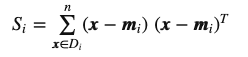

##From Sklearn

In [4]:
#@title Scaling data { display-mode: "form" }
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
Standard_x = stdsc.fit_transform(df.iloc[:,range(0,4)].values)

In [5]:
#@title LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(Standard_x,df['Class'])

In [6]:
#@title Show DataFrame
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0


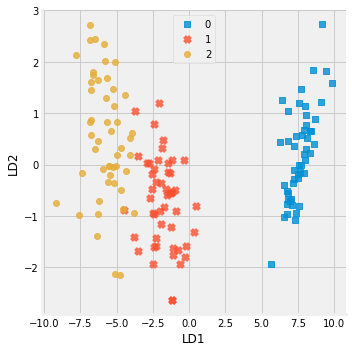

In [7]:
#@title plot
markers = ['s', 'x','o']
colors = ['r', 'b','g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers,fit_reg=False,legend=False)
plt.legend(loc='upper center')
plt.show()


##Model

In [8]:
#@title Train Test Split { display-mode: "form" }
def split_test_train(x,y,train_size =0.80,seed=None):
  np.random.seed(seed)
  y=np.array(y)
  data=np.concatenate([x,y.reshape(-1,1)],axis=1)
  np.random.shuffle(data)
  xtrain=data[:int(len(data)*train_size),:-1]
  ytrain=data[:int(len(data)*train_size),-1]
  xtest=data[int(len(data)*train_size):,:-1]
  ytest=data[int(len(data)*train_size):,-1]
  return xtrain,ytrain,xtest,ytest

In [9]:
#@title TTS-2
x = data.drop(columns='class',inplace=False)
y = data['class']
xtrain,ytrain,xtest,ytest = split_test_train(x,y,train_size=0.90,seed=10)
print('Train data shapes \nx =',xtrain.shape,'y= ',ytrain.shape,'\nTest data shapes\nx =',xtest.shape,'y =',ytest.shape)

Train data shapes 
x = (135, 2) y=  (135,) 
Test data shapes
x = (15, 2) y = (15,)


In [10]:
#@title Model Fiting
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
mnb = GaussianNB()
ovr = OneVsRestClassifier(mnb)
ovr.fit(xtrain,ytrain)

OneVsRestClassifier(estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                    n_jobs=None)

In [11]:
#@title Metrics 
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score
print(confusion_matrix(ovr.predict(xtest),ytest))
print('Accuracy=',(accuracy_score(ovr.predict(xtest),ytest)*100),'%')
print(classification_report(ovr.predict(xtest),ytest))

[[6 0 0]
 [0 3 0]
 [0 0 6]]
Accuracy= 100.0 %
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



##From Scratch

In [12]:
class_feature_means = pd.DataFrame(columns=[0,1,2])
for c, rows in df.groupby('Class'):
    class_feature_means[c] = rows.mean()

In [13]:
class_feature_means

,0,1,2
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026
Class,0.000,1.000,2.000


***Between The class Scatter Matrix***

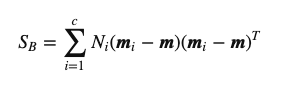

In [14]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df.iloc[:,range(0,4)].values)

In [15]:
y = df['Class']
S_W = np.zeros((4,4))
for i in range(3):
    S_W += np.cov(X_train_std[y==i].T)

In [16]:
S_W

array([[1.16722735, 0.77586555, 0.34609473, 0.1837458 ],
       [0.77586555, 1.83433822, 0.21683848, 0.29734854],
       [0.34609473, 0.21683848, 0.17947433, 0.09576187],
       [0.1837458 , 0.29734854, 0.09576187, 0.21770532]])

In [17]:
N=np.bincount(y) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X_train_std[y==i],axis=0)) for i in range(3)] # class means
mean_overall = np.mean(X_train_std, axis=0) # overall mean
S_B=np.zeros((4,4))
for i in range(3):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(4,1)).dot(((vecs[i]-mean_overall).reshape(1,4))))

In [18]:
S_B

array([[ 92.80585961, -55.65287963, 113.80442453, 113.68762457],
       [-55.65287963,  60.11742706, -74.89110136, -69.48896849],
       [113.80442453, -74.89110136, 141.20575786, 139.73748309],
       [113.68762457, -69.48896849, 139.73748309, 139.33243952]])

In [19]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

1577.404530715623
13.98416108853068
1.1026306495706073e-13
1.0211039219563638e-13


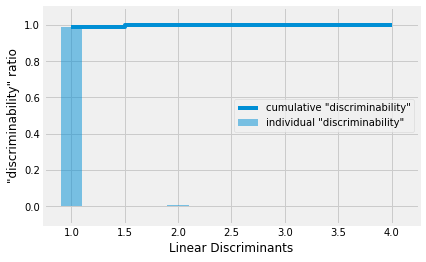

In [20]:

tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 5), discr, width=0.2,alpha=0.5, align='center',label='individual "discriminability"')
plt.step(range(1, 5), cum_discr, where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [21]:
W=np.hstack((eigen_pairs[0][1][:, ].reshape(4,1),eigen_pairs[1][1][:, ].reshape(4,1))).real
X_train_lda = X_train_std.dot(W)

In [22]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-1.781849,0.104751,0
1,-1.575609,-0.274293,0
2,-1.655430,-0.092534,0
3,-1.505879,-0.233836,0
4,-1.797434,0.179383,0


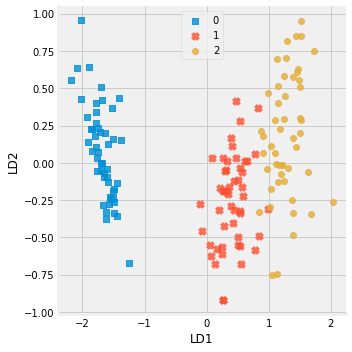

In [23]:
markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=data, markers=markers,fit_reg=False, hue='class', legend=False)
plt.legend(loc='upper center')
plt.show()